In [1]:
import os, sys
import numpy as np
import pandas as pd
from pprint import pprint
sys.path.append('script')

from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=True)

from Synthesis import init_LocalTransform, predict_product

dataset = 'USPTO_480k' # get the info of derived templates
scenario = 'mix' # 'sep' or 'mix'

device = 'cuda:0'
model_name = 'LocalTransform_%s' % scenario
model_path = 'models/%s.pth' % model_name
config_path = 'data/configs/default_config'
data_dir = 'data/%s' % dataset

args = {'data_dir': data_dir, 'model_path': model_path, 'config_path': config_path, 'device': device, 'mode': 'test'}
model, graph_functions, template_dicts, template_infos = init_LocalTransform(args)
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print ('# model parameters: %.2fM' % (params/1000000))

Using backend: pytorch


Parameters of loaded LocalTransform:
{'attention_heads': 8, 'attention_layers': 3, 'edge_hidden_feats': 32, 'node_out_feats': 256, 'num_step_message_passing': 3, 'Template_rn': 4540, 'Template_vn': 2635, 'in_node_feats': 80, 'in_edge_feats': 13}
loaded 4540 real templates
loaded 2635 virtual templates
# model parameters: 13.49M


0th prediction: [A:1].[A:2]-[A:3]>>[A:1]-[A:2] A [7, 18] 0.96175116
1th prediction: [A:1].[A:2]-[A:3]>>[A:1]-[A:2] B [18, 19] 0.9193174
2th prediction: [A:1].[A:2]-[A:3]>>[A:1]-[A:2] B [15, 16] 0.15873457
3th prediction: [A:1].[A:2]-[A:3]>>[A:1]-[A:2] A [7, 15] 0.10370193
4th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] B [6, 7] 0.002759918
5th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] A [18, 7] 0.002569151
6th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] B [18, 19] 0.0021367567
7th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] A [15, 7] 0.0008887323
8th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] A [7, 18] 0.00072649453
9th prediction: [A:1]-[A:2]>>[A:1] B [6, 7] 0.00063602644
10th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] A [18, 6] 0.00032851167
11th prediction: [A:1]-[A:3].[A:2]-[A:4]>>[A:1]-[A:2] A [6, 18] 0.00014784368
12th prediction: [A:1]-[A:2]>>[A:1] B [18, 19] 0.00010303743
{'Reactants': 'C1CCOC1.N#Cc1ccsc1N.O=[N+]([O-])c1cc(F)c(F)cc1F.[H-].[Na+]

,Reactants,Top-1,Top-2,Top-3,Top-4,Top-5
0,,,,,,

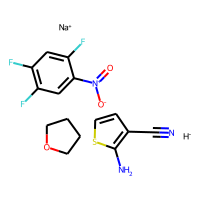
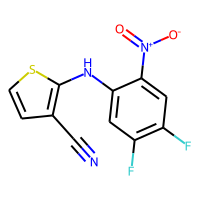
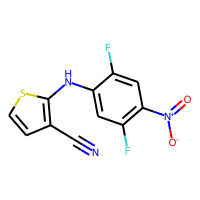
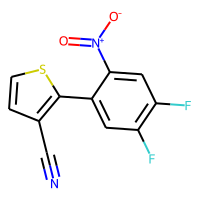
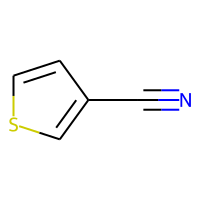
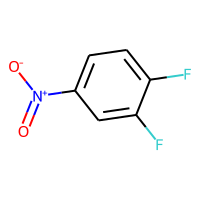

In [2]:
# Simple reaction outcome prediction
reactants = 'N#Cc1ccsc1N.O=[N+]([O-])c1cc(F)c(F)cc1F.C1CCOC1.[H-].[Na+]'
sep = False
verbose = 1
results_df, results_dict = predict_product(reactants, model, graph_functions, device, template_dicts, template_infos, verbose = verbose, sep = sep)
pprint (results_dict)
results_df

In [2]:
# Human benchmark
from tqdm import tqdm

url = 'https://github.com/connorcoley/rexgen_direct/blob/master/human/benchmarking.xlsx?raw=true'
human_benchmark_rxns = pd.read_excel(url)['Reaction smiles'][:80]
        
reactants = []
products = []
scores = []
corrects = []
for rxn in tqdm(human_benchmark_rxns):
    reactant, product = rxn.split('>>')
    results_df, results_dict  = predict_product(reactant, model, graph_functions, device, template_dicts, template_infos, product = product, top_k = 1, verbose = 0)
    reactants.append(results_df['Reactants'][0])
    products.append(results_df['Top-1'][0])
    scores.append(results_dict['Top-1']['score'])
    corrects.append(results_df['Correct at'][0])

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:41<00:00,  1.92it/s]


,Reactants,Top-1 products,Scores,Correct
0,,,0.963367,1
1,,,0.504196,1
2,,,0.998750,1
3,,,0.995976,1
4,,,0.608511,1
5,,,0.578381,1
6,,,0.931030,1
7,,,0.924893,1
8,,,0.917207,1
9,,,0.999664,1

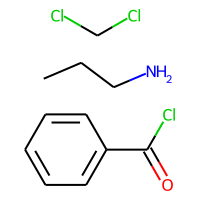
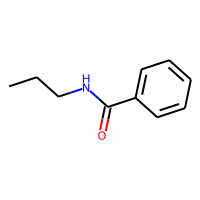
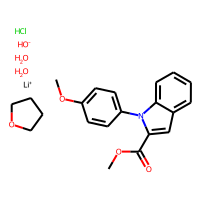
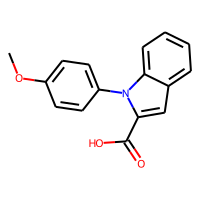
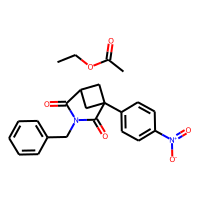
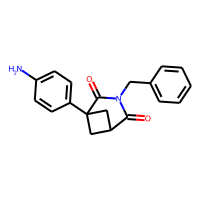
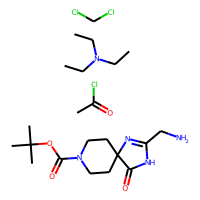
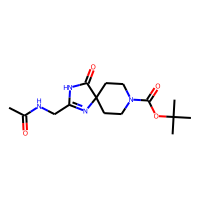
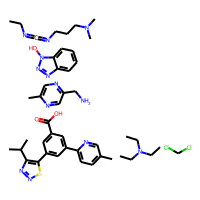
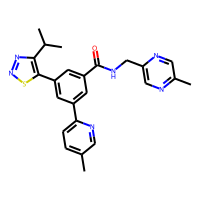
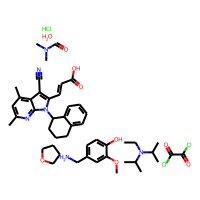
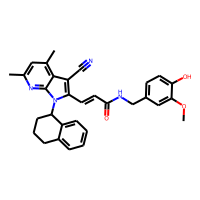
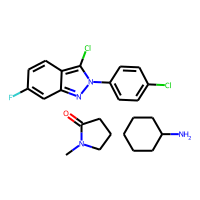
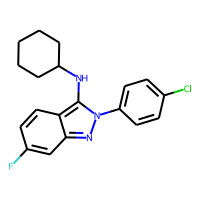
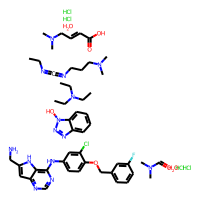
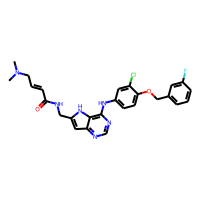
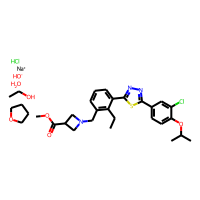
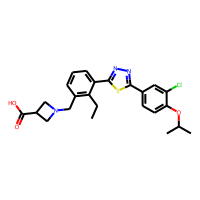
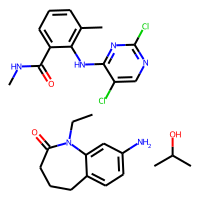
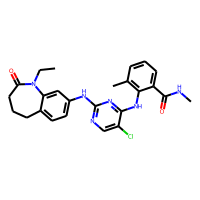
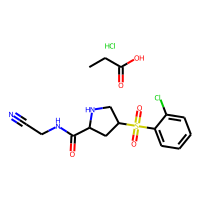
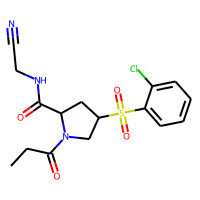
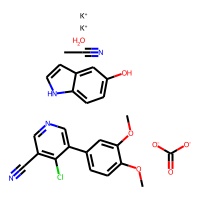
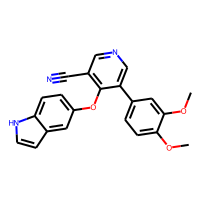
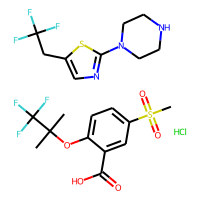
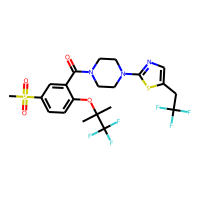
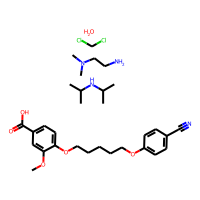
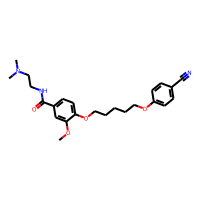
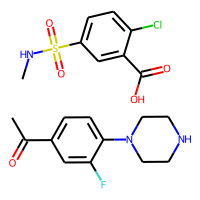
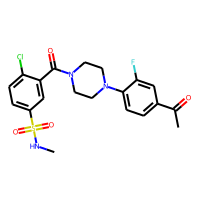
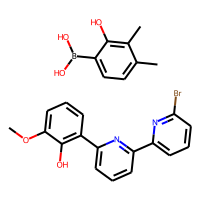
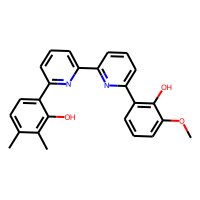
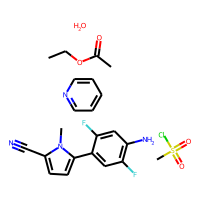
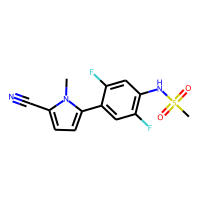
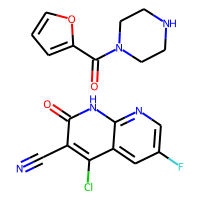
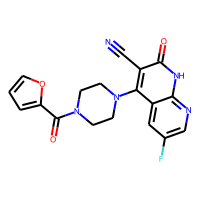
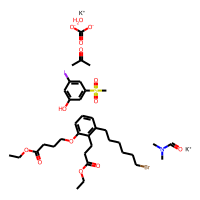
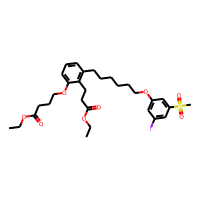
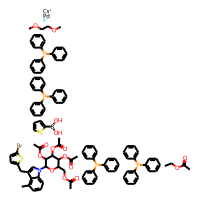
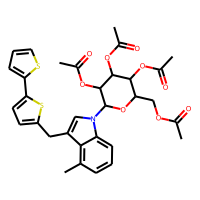
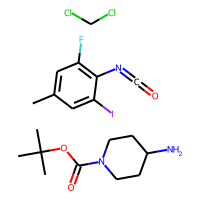
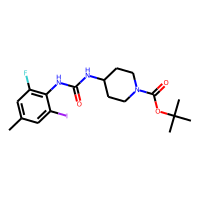
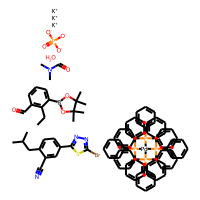
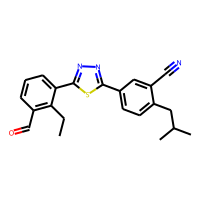
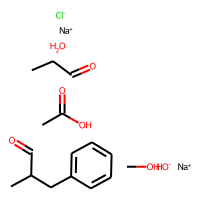
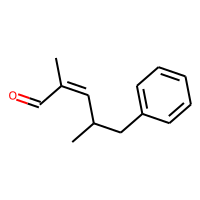
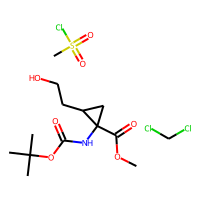
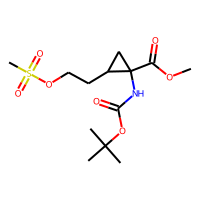
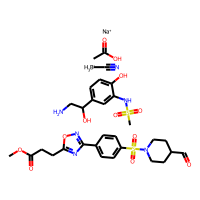
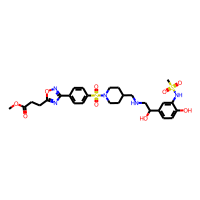
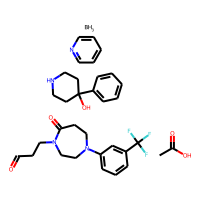
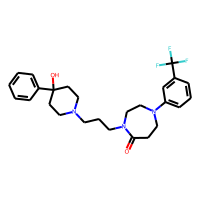
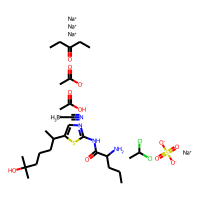
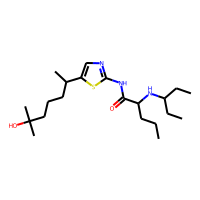
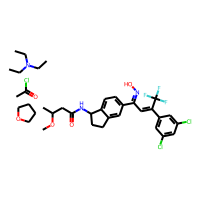
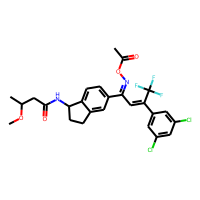
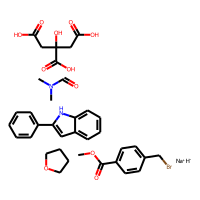
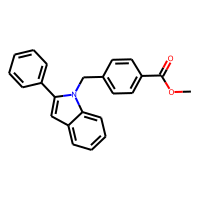
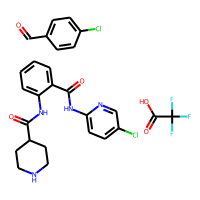
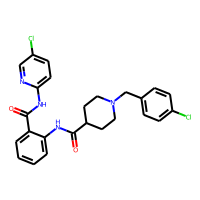
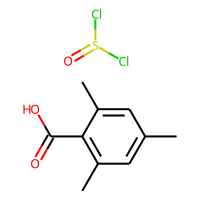
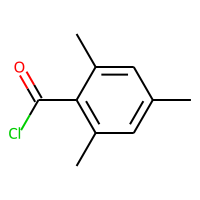
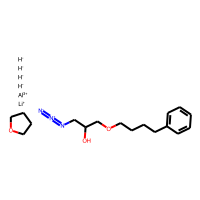
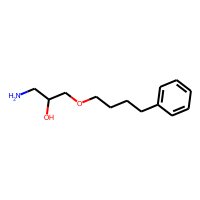
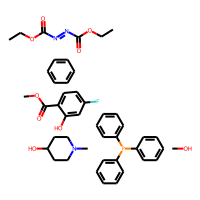
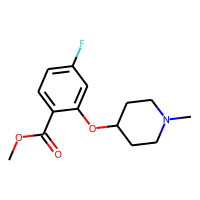
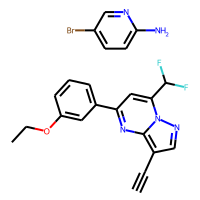
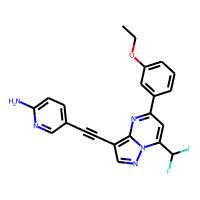
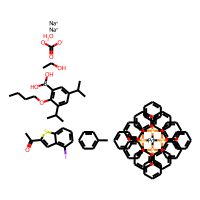
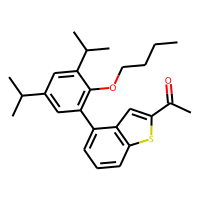
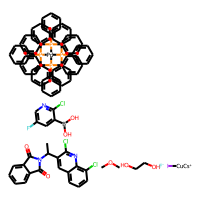
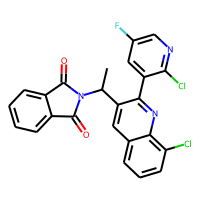
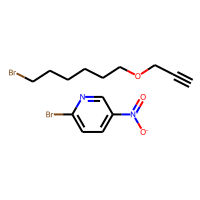
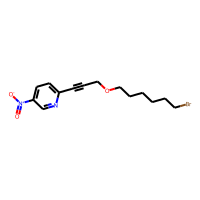
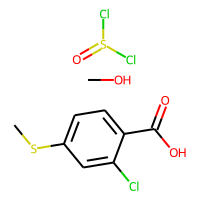
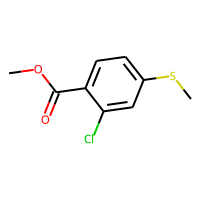
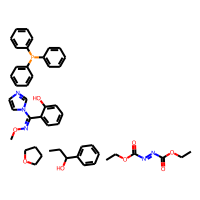
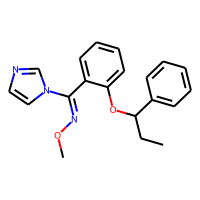
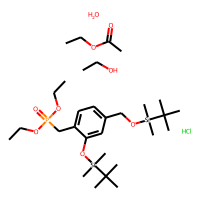
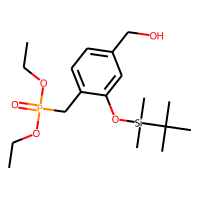
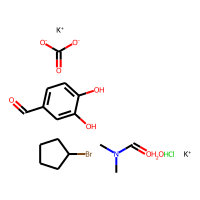
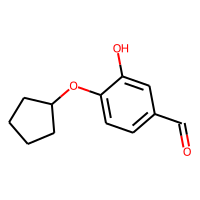
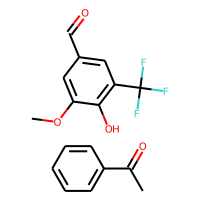
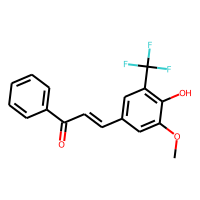
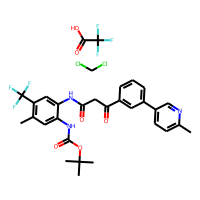
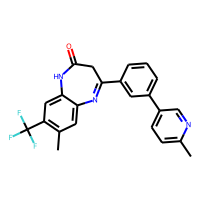
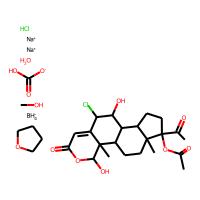
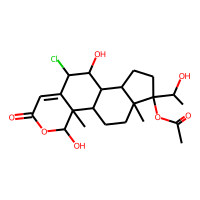
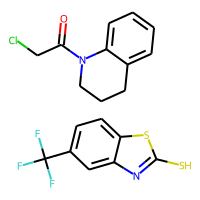
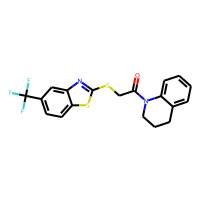
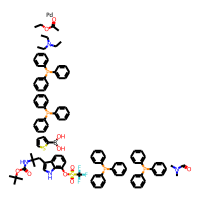
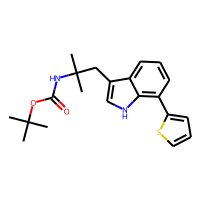
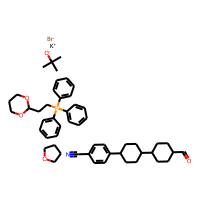
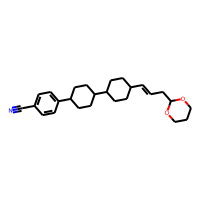
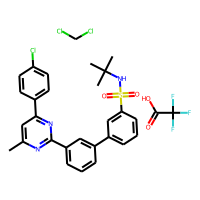
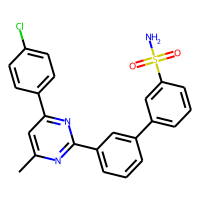
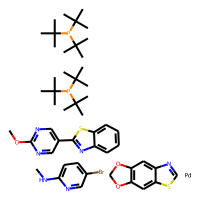
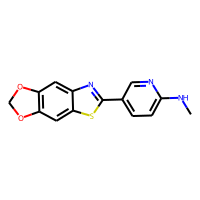
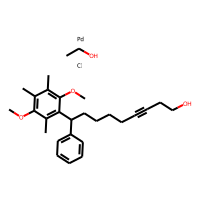
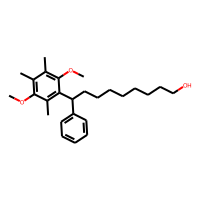
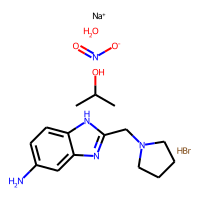
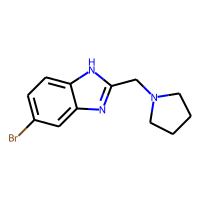
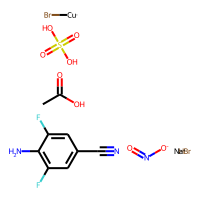
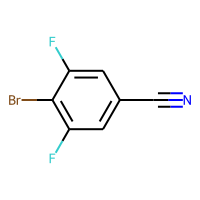
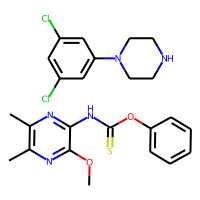
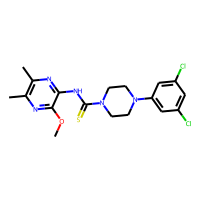
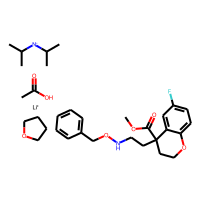
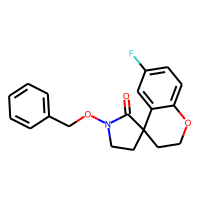
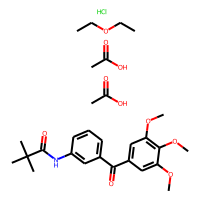
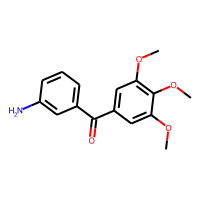
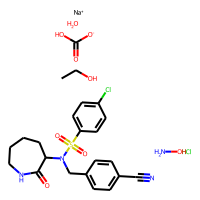
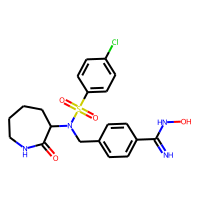
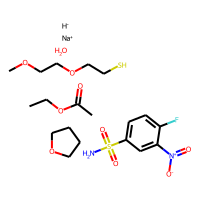
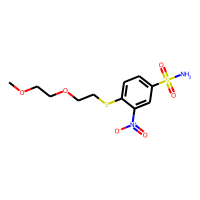
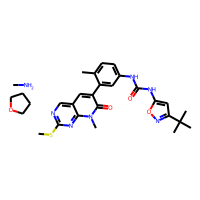
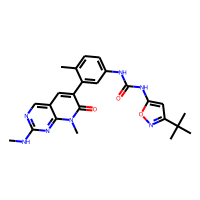
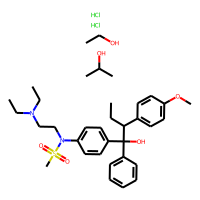
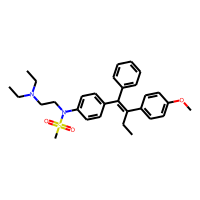
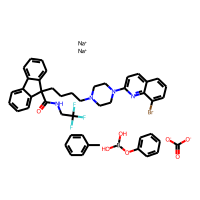
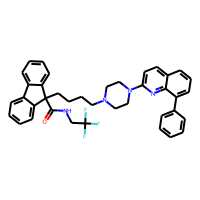
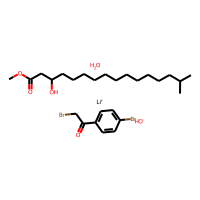
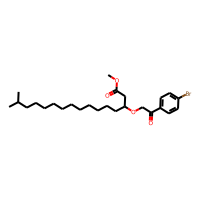
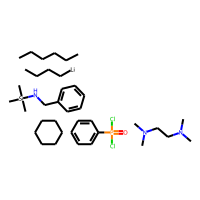
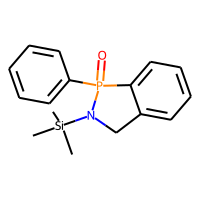
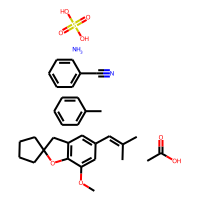
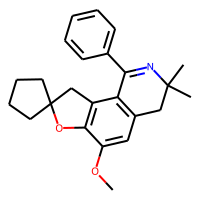
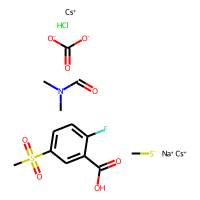
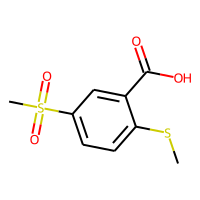
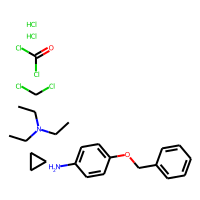
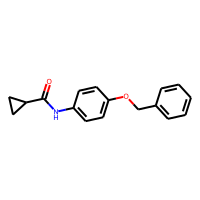
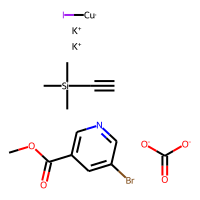
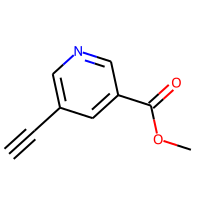
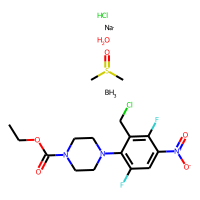
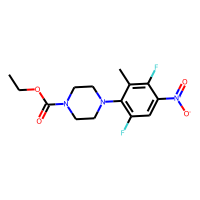
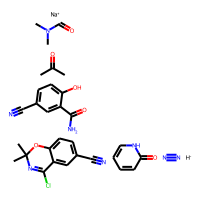
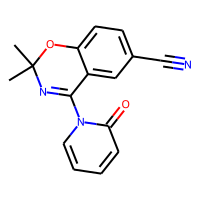
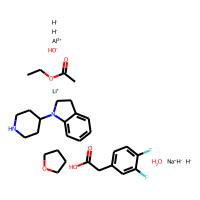
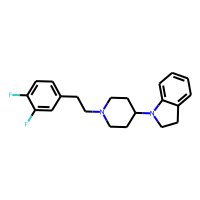
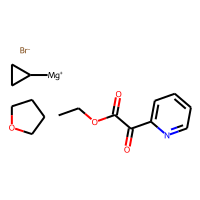
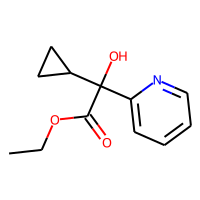
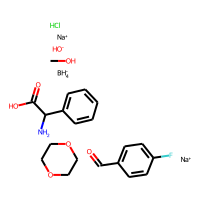
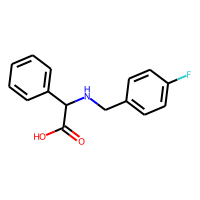
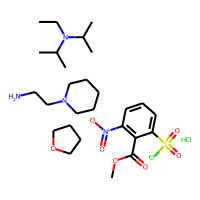
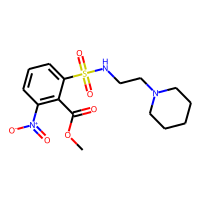
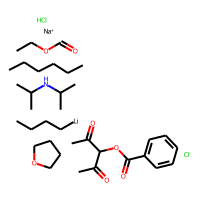
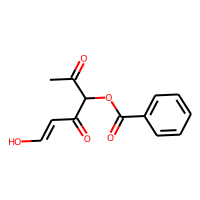
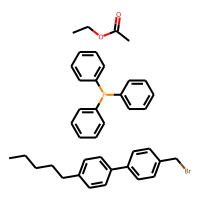
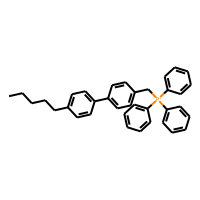
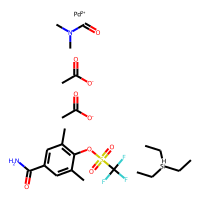
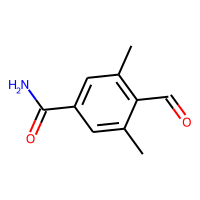
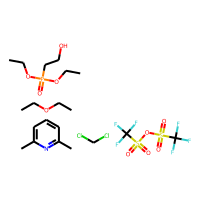
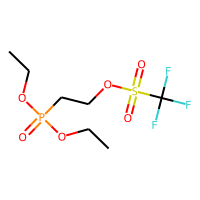
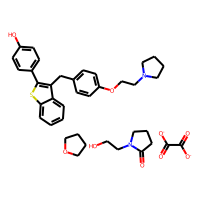
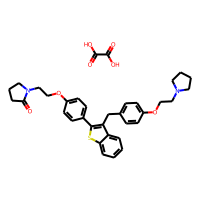
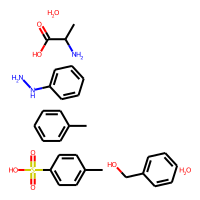
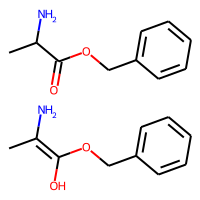
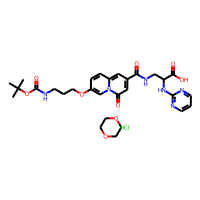
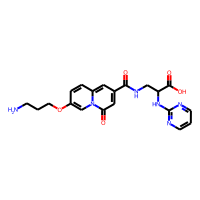
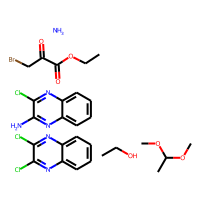
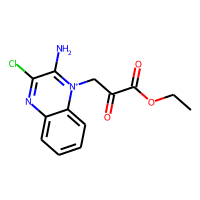

In [3]:
pd.set_option('display.max_rows', None)
pd.DataFrame({'Reactants':reactants, 'Top-1 products': products,  'Scores': scores, 'Correct': corrects})